In [1]:
import numpy as np
from astropy import units as u
from astropy.io import fits
import copy
import poppy
from model_kit import magaoxFunctions as mf
import matplotlib.pyplot as plt
import matplotlib
import mpl_toolkits.axes_grid1

In [8]:
# set up file locations
home_dir = '/home/jhen/XWCL/code/MagAOX/' # laptop local
data_dir = home_dir + 'data/'
fr_out_dir = 'data_fig/n0_common/'
# bump mask
bump_fits = fits.open(data_dir+'mask/bump_mask_vapp.fits')[0]
bump_mask = bump_fits.data
bump_pixscale = bump_fits.header['PUPLSCAL']*u.m/u.pix

# set the axis values for the bump mask
box = int(bump_mask.shape[0]/2)
rk = np.linspace(-box, box, (box*2), endpoint=False) * u.pix
rks = ((rk*bump_pixscale).to(u.mm))

In [9]:
# psf
psf_fits = fits.open(fr_out_dir+'psf_sr_common_s0_i4_656nm_bump.fits')[0]
psf_data = psf_fits.data
psf_hdr = psf_fits.header
sr_avg = 0.931
sr_std = 0.010

# crop the PSF
zoomsize = 80
psf_zoom = poppy.utils.pad_or_crop_to_shape(psf_data, (zoomsize*2, 2*zoomsize))
psf_zoom = psf_zoom/np.amax(psf_zoom) # normalize

# setting the values for lambda/d
fnum_det = 69
platescl = 206265*u.arcsec / (psf_hdr['DIAM']*u.m * fnum_det)
LD_scale = (1/platescl) * (1/(psf_hdr['PIXELSCL'] * u.m / u.pix)) * (psf_hdr['DIFFLMT'] * u.arcsec)
rk_LD = np.linspace(-zoomsize, zoomsize, (zoomsize*2), endpoint=False) * u.pix
rks_LD = (rk_LD / LD_scale)

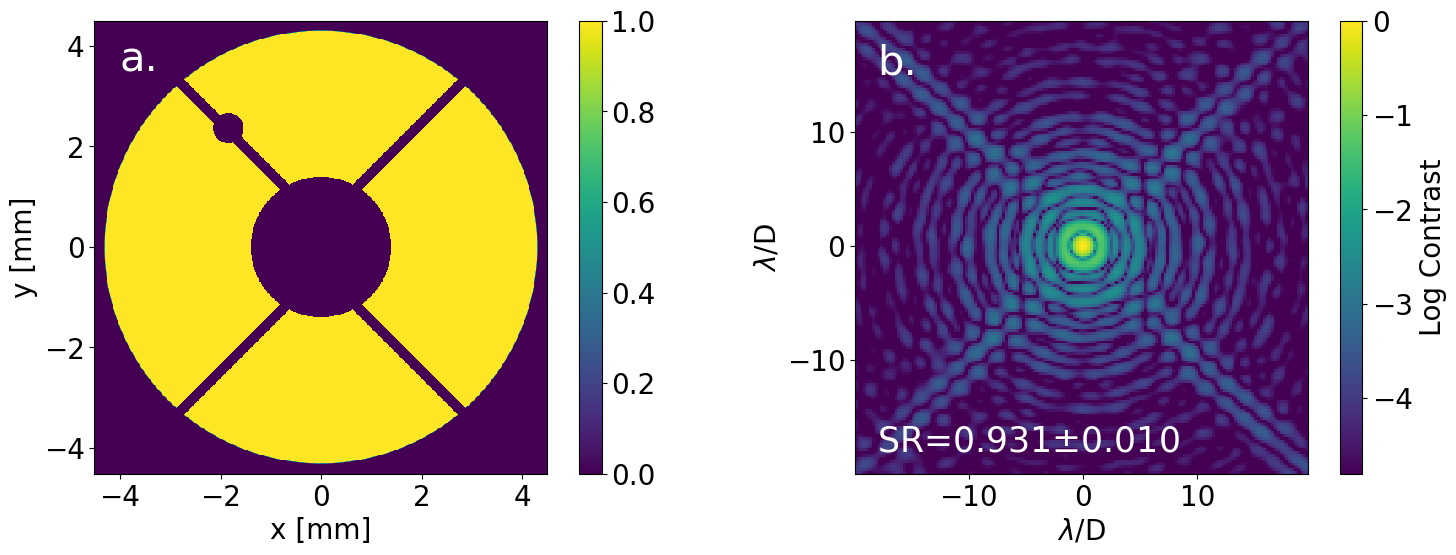

In [19]:
matplotlib.rcParams["font.size"]=20
plt.figure(figsize=[18,6], dpi=100, facecolor='white')

plt.subplot(121)
rks_extent = [np.amin(rks).value, np.amax(rks).value, 
              np.amin(rks).value, np.amax(rks).value]
plt.imshow(bump_mask, origin='lower', extent=rks_extent)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-4, -2, 0, 2, 4])
plt.xlabel('x [{0}]'.format(str(rks.unit)))
plt.ylabel('y [{0}]'.format(str(rks.unit)))
plt.text(-4, 3.5, 'a.', fontsize=30, color='white')
plt.colorbar()#.set_label(str(wfe_tweeter['surf'].unit))

plt.subplot(122)
rks_LD_extent = [np.amin(rks_LD).value, np.amax(rks_LD).value, 
              np.amin(rks_LD).value, np.amax(rks_LD).value]
plt.imshow(np.log10(psf_zoom), origin='lower', extent=rks_LD_extent,
           vmin=-4.8, vmax=0)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlabel('$\lambda$/D')
plt.ylabel('$\lambda$/D')
plt.text(-18, 15, 'b.', fontsize=30, color='white')
plt.text(-18, -18, 'SR={0:.3f}$\pm${1:.3f}'.format(sr_avg, sr_std),
         color='white', fontsize=25)
plt.colorbar().set_label('Log Contrast')

plt.show()